## Q1. What is Gradient Boosting Regression?



Gradient Boosting Regression is a machine learning algorithm that belongs to the ensemble learning family, specifically the boosting algorithms. It is used for regression tasks, where the goal is to predict a continuous numerical value. Gradient Boosting Regression builds a strong predictive model by combining the predictions of multiple weak learners (typically decision trees) in a sequential manner.

Here's a general overview of how Gradient Boosting Regression works:

1. **Initialization:**
   - Start with a simple model, often a decision tree with a shallow depth (a weak learner).
   - Make predictions on the training data.

2. **Compute Residuals:**
   - Calculate the difference between the predicted values and the actual target values (residuals).

3. **Fit a New Weak Learner:**
   - Train a new weak learner (decision tree) on the residuals. This new model aims to correct the errors made by the previous model.

4. **Update Predictions:**
   - Update the overall predictions by combining the predictions of all weak learners. This is done in a way that minimizes the residual errors.

5. **Iterate:**
   - Repeat the process by calculating new residuals, fitting additional weak learners, and updating predictions until a specified number of iterations is reached or until a convergence criterion is met.

6. **Final Prediction:**
   - The final prediction is the sum of the predictions of all weak learners. The combination of weak learners, each focusing on correcting the errors of the previous ones, results in a strong regression model.

Gradient Boosting Regression uses the gradient descent optimization technique to minimize the loss function (typically mean squared error for regression tasks). In each iteration, the new weak learner is trained to capture the remaining error, and its predictions are added to the ensemble. The process continues until the algorithm converges or reaches a predefined stopping criterion.

Popular implementations of Gradient Boosting Regression include XGBoost, LightGBM, and CatBoost, each with its own optimizations and enhancements over the basic algorithm.



## Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a simple regression problem as an example and train the model on a small dataset. Evaluate the model's performance using metrics such as mean squared error and R-squared.

Mean Squared Error: 46.7319
R-squared: -0.2737


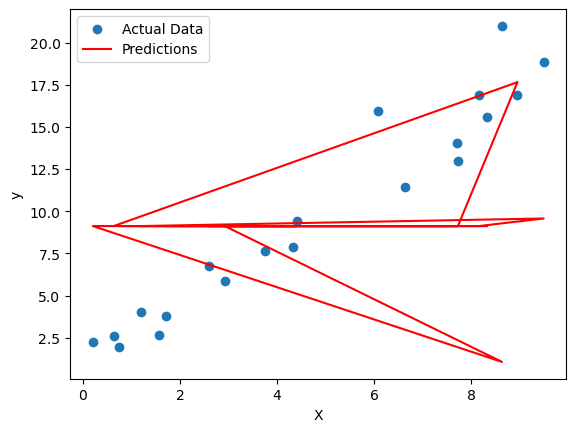

In [4]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate a synthetic dataset for regression
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + np.random.randn(100) * 2

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of boosting iterations (weak learners)
n_iterations = 100

# Learning rate (shrinkage)
learning_rate = 0.1

# Initialize predictions with the mean of the target variable
predictions = np.full_like(y_train, np.mean(y_train))

# Gradient boosting iterations
for i in range(n_iterations):
    # Compute residuals (negative gradient)
    residuals = y_train - predictions
    
    # Fit a weak learner (shallow decision tree) to the residuals
    weak_learner = DecisionTreeRegressor(max_depth=2)
    weak_learner.fit(X_train, residuals)
    
    # Update predictions with the scaled predictions of the weak learner
    predictions += learning_rate * weak_learner.predict(X_train)

# Evaluate the model on the test set
y_pred = np.full_like(y_test, np.mean(y_train))
for i in range(n_iterations):
    y_pred += learning_rate * weak_learner.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot the original data and the predictions
plt.scatter(X_test, y_test, label="Actual Data")
plt.plot(X_test, y_pred, color='red', label="Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


## Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to optimise the performance of the model. Use grid search or random search to find the best hyperparameters

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4]
}

# Create the Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(gb_reg, param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_gb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_gb_model.predict(X_test)

# Calculate metrics for the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model - Mean Squared Error: {mse_best:.4f}")
print(f"Best Model - R-squared: {r2_best:.4f}")


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
Best Model - Mean Squared Error: 2.7049
Best Model - R-squared: 0.9263


## Q4. What is a weak learner in Gradient Boosting?



In the context of gradient boosting, a weak learner is a model that performs slightly better than random chance on a given task. More formally, a weak learner is a model that has an accuracy or predictive performance that is only slightly better than random guessing. Weak learners are typically simple and have low complexity, such as shallow decision trees or linear models.

The concept of weak learners is fundamental to the success of gradient boosting. The boosting algorithm sequentially combines the predictions of these weak learners to create a strong learner that can achieve high accuracy on the overall task. The iterative nature of boosting allows the algorithm to focus on the mistakes made by the previous weak learners and correct them in subsequent iterations.

For example, in the context of a regression problem, a weak learner might be a decision tree with a limited depth (a stump). In each iteration of gradient boosting, a new weak learner is trained to predict the residuals (the differences between the true values and the current ensemble's predictions). This process is repeated until a predefined number of weak learners are combined to form the final strong model.

The key characteristics of a weak learner in gradient boosting are:

1. **Low Complexity:** Weak learners are intentionally kept simple to prevent overfitting to the noise in the data and to ensure that each model contributes a small improvement.

2. **Better than Random:** While weak learners may not perform exceptionally well on their own, they should perform better than random guessing, providing some useful information.

3. **Efficiency:** Weak learners are computationally efficient to train, allowing for the construction of an ensemble in a reasonable amount of time.

Popular choices for weak learners include decision stumps (trees with a single split), shallow decision trees, or linear models. The effectiveness of gradient boosting comes from the ability to combine many weak learners in a way that compensates for each model's weaknesses and leads to a strong overall predictive model.

## Q5. What is the intuition behind the Gradient Boosting algorithm?



The Gradient Boosting algorithm is an ensemble learning technique that builds a strong predictive model by combining the predictions of multiple weak learners in a sequential manner. The intuition behind the Gradient Boosting algorithm can be summarized as follows:

1. **Sequential Correction of Errors:**
   - The algorithm starts with an initial simple model (usually a weak learner, such as a decision tree with limited depth).
   - The first model makes predictions on the training data, and the errors (residuals) between the predictions and actual outcomes are calculated.

2. **Focus on Mistakes:**
   - The subsequent weak learners are trained to correct the errors made by the previous models. They pay more attention to instances that were poorly predicted by the ensemble so far.

3. **Gradient Descent Optimization:**
   - During each iteration, the algorithm fits a weak learner to the negative gradient (residuals) of the loss function with respect to the current ensemble's predictions.
   - The new model is trained to reduce the errors made by the previous models, effectively moving the overall model towards the optimal direction.

4. **Weighted Voting:**
   - Each weak learner is assigned a weight based on its performance. Models that contribute more to reducing errors are given higher weights.
   - The final prediction is a weighted sum of the predictions of all weak learners.

The intuition behind the algorithm lies in the combination of weak learners to form a strong model that can accurately predict the target variable. By sequentially correcting errors and adjusting predictions, the ensemble becomes more powerful with each iteration.

Key Intuitive Aspects:

- **Adaptability:** Gradient Boosting adapts to the complexities of the data by focusing on instances that are difficult to predict.

- **Robustness:** The algorithm is robust to outliers and noise due to its ability to assign higher weights to misclassified instances.

- **Flexibility:** It can handle various types of data and tasks, including regression and classification.

- **Non-Linearity:** Gradient Boosting can capture complex non-linear relationships within the data.

In summary, the intuition behind Gradient Boosting is to iteratively improve predictions by sequentially training weak learners to correct errors and create a strong ensemble that provides accurate and robust predictions on the given task.

## Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?



The Gradient Boosting algorithm builds an ensemble of weak learners in a sequential manner, where each new weak learner is trained to correct the errors made by the existing ensemble. The process involves the following steps:

1. **Initialization:**
   - The algorithm starts with an initial prediction, often the mean (for regression tasks) or the log-odds (for classification tasks) of the target variable.

2. **Compute Residuals:**
   - Calculate the residuals by subtracting the current prediction from the actual target values. The residuals represent the errors made by the current ensemble.

3. **Fit a Weak Learner to Residuals:**
   - Train a weak learner (e.g., a shallow decision tree) on the residuals. The weak learner is typically a model with low complexity, capturing the remaining patterns in the data that were not captured by the existing ensemble.

4. **Update Predictions:**
   - Update the overall predictions by adding a scaled version of the predictions from the new weak learner. The scaling factor is determined by a learning rate, which is a hyperparameter that controls the contribution of each weak learner.

5. **Repeat:**
   - Repeat the process for a predefined number of iterations or until a stopping criterion is met. In each iteration, a new weak learner is trained on the residuals, and its predictions are added to the ensemble.

6. **Final Ensemble:**
   - The final ensemble is the sum of the predictions from all weak learners, each multiplied by its corresponding weight. The weights are determined based on the performance of each weak learner, giving more influence to models that contribute more to reducing errors.

The optimization process in gradient boosting involves finding the optimal parameters for each weak learner by minimizing a predefined loss function. The loss function measures the discrepancy between the predicted values and the true target values. The gradient of the loss function with respect to the current predictions guides the training of each new weak learner.

The algorithm's adaptability and performance come from the sequential correction of errors, with each weak learner focusing on the mistakes made by the existing ensemble. This process allows the model to capture complex relationships in the data and build a strong predictive model. Popular implementations of gradient boosting include XGBoost, LightGBM, and CatBoost, each with optimizations and enhancements over the basic algorithm.

## Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting algorithm?

Constructing the mathematical intuition of the Gradient Boosting algorithm involves understanding the optimization process, loss function, and the role of weak learners in the context of gradient descent. Here are the key steps involved in developing the mathematical intuition of the Gradient Boosting algorithm:

1. **Define the Loss Function:**
   - Start with a well-defined loss function that measures the discrepancy between the predicted values and the true target values. For regression problems, this could be the mean squared error, and for classification problems, it could be the log loss.

2. **Initialize with a Constant Prediction:**
   - Initialize the model with a constant prediction, often the mean (for regression) or the log-odds (for classification) of the target variable.

3. **Compute the Negative Gradient of the Loss:**
   - Compute the negative gradient of the loss function with respect to the current predictions. This gradient represents the direction and magnitude of the steepest decrease in the loss. It guides the training of the next weak learner.

4. **Train a Weak Learner:**
   - Train a weak learner (e.g., a shallow decision tree) on the negative gradient (residuals). The weak learner is fitted to capture the patterns in the data that were not well-represented by the existing ensemble.

5. **Update Predictions:**
   - Update the overall predictions by adding a scaled version of the predictions from the new weak learner. The scaling factor is determined by a learning rate, which is a hyperparameter that controls the contribution of each weak learner.

6. **Repeat:**
   - Repeat the process for a predefined number of iterations or until a stopping criterion is met. In each iteration, compute the negative gradient of the loss, train a new weak learner on the negative gradient, and update the predictions.

7. **Final Ensemble:**
   - The final ensemble is the sum of the predictions from all weak learners, each multiplied by its corresponding weight. The weights are determined based on the performance of each weak learner, giving more influence to models that contribute more to reducing errors.

8. **Optimization via Gradient Descent:**
   - The algorithm optimizes the parameters of each weak learner using a form of gradient descent. In each iteration, the weak learner is trained to minimize the negative gradient of the loss.

9. **Regularization (Optional):**
   - Optionally, apply regularization techniques to prevent overfitting, such as controlling the depth of the weak learners or introducing regularization terms in the optimization.

10. **Final Model:**
    - The final model is a combination of weak learners, each trained to correct the errors of the existing ensemble. The adaptability and accuracy of the model come from the sequential correction of errors.

Understanding these mathematical steps provides insight into how Gradient Boosting constructs a powerful ensemble of weak learners through an optimization process guided by the negative gradient of the loss function. The algorithm's ability to adapt and improve predictions with each iteration makes it a widely used and effective technique in machine learning.